In [24]:
from paddleocr import PaddleOCR, draw_ocr

# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(
    use_angle_cls=True,
    rec=False,
    lang="ru",
    rec_algorithm='SVTR_LCNet',
    rec_model_dir='./inference/svtr_kz_multi_word',
    rec_char_dict_path='./ppocr/utils/dict/kz_dict.txt',
)  # need to run only once to download and load model into memory

[2023/08/13 17:22:05] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/bma/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='./inference/svtr_kz_multi_word', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='./ppoc

In [25]:
img_path = './train_data/test_100/[Абұйыр] (4).JPG'
result = ocr.ocr(img_path,  rec=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)
result = result[0]

[2023/08/13 17:22:07] ppocr DEBUG: dt_boxes num : 29, elapse : 0.12923312187194824
[2023/08/13 17:22:07] ppocr DEBUG: cls num  : 29, elapse : 0.038120269775390625
[2023/08/13 17:22:07] ppocr DEBUG: rec_res num  : 29, elapse : 0.2665560245513916
[[[479.0, 13.0], [656.0, 13.0], [656.0, 113.0], [479.0, 113.0]], ('Си', 0.6480175256729126)]
[[[655.0, 17.0], [843.0, 27.0], [839.0, 110.0], [651.0, 100.0]], ('Бвр', 0.8043327331542969)]
[[[685.0, 164.0], [867.0, 157.0], [869.0, 217.0], [687.0, 224.0]], ('Бо', 0.9934033751487732)]
[[[40.0, 180.0], [207.0, 180.0], [207.0, 243.0], [40.0, 243.0]], ('Свлас', 0.6377468109130859)]
[[[248.0, 186.0], [360.0, 179.0], [365.0, 263.0], [253.0, 270.0]], ('Ог', 0.7072820663452148)]
[[[67.0, 268.0], [195.0, 302.0], [170.0, 398.0], [42.0, 364.0]], ('Д', 0.8743773698806763)]
[[[476.0, 269.0], [683.0, 269.0], [683.0, 347.0], [476.0, 347.0]], ('Мтдр', 0.6761173009872437)]
[[[776.0, 285.0], [1243.0, 280.0], [1244.0, 339.0], [777.0, 343.0]], ('ҮмыбАсСі', 0.516695201

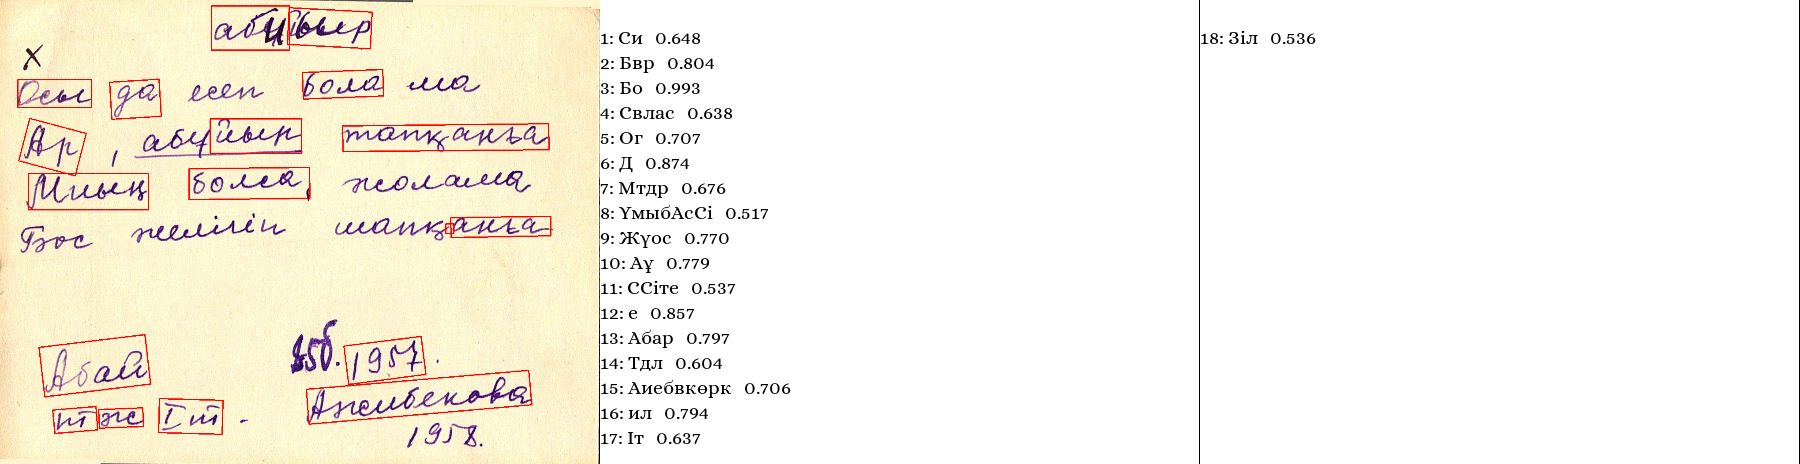

In [26]:
# draw result
from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
image = image.rotate(90, Image.NEAREST, expand = 1)
# rotate image 90 degrees
im_show = draw_ocr(image, boxes, txts, scores, font_path='./doc/fonts/kazakh.ttf')
im_show = Image.fromarray(im_show )

# save image
im_show.show()

In [17]:
img_path = './train_data/test_100/[Абұйыр] (4).JPG'
result = ocr.ocr(img_path, rec=False)
for idx in range(len(result)):
    res = result[idx]


result = result[0]

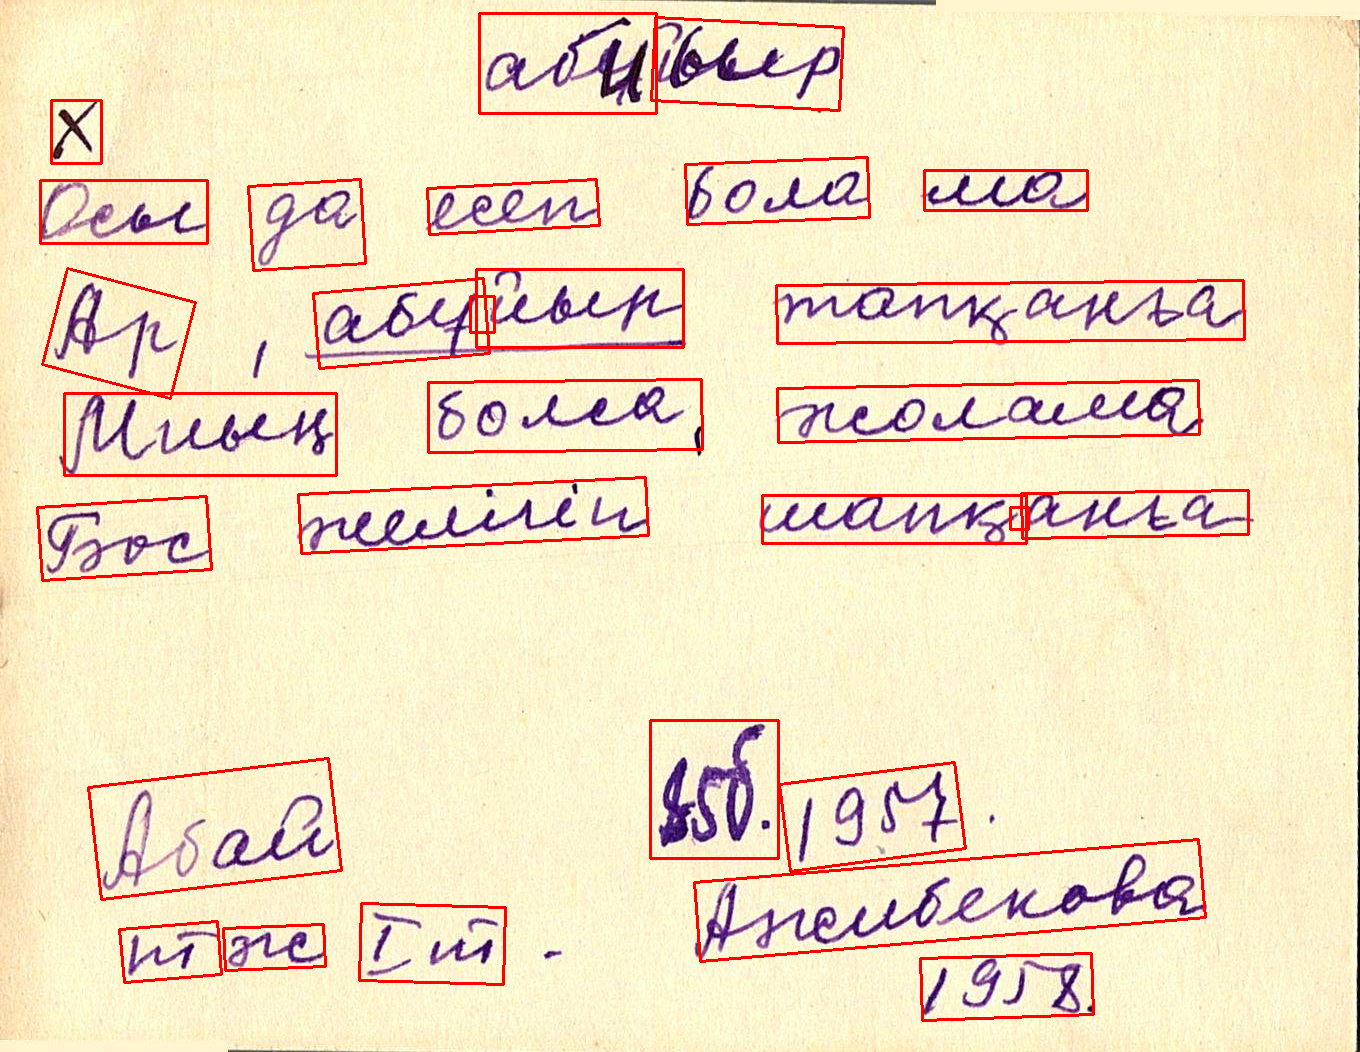

In [19]:
# draw result
from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line for line in result]
# rotate image 90 degrees
image = image.rotate(90, Image.NEAREST, expand = 1)
im_show = draw_ocr(image, boxes, font_path='./doc/fonts/kazakh.ttf')
im_show = Image.fromarray(im_show)

# save image
im_show.show()